In [18]:
import os
print(os.listdir("D:\CODE\ML\ML_FINAL_PROJECT\dataset"))

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [19]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
from tensorflow.python.client import device_lib

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [18]:
import numpy as np
from skimage import io, color, exposure, transform
from sklearn.model_selection import train_test_split
import os
import glob
import h5py
from PIL import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')

from matplotlib import pyplot as plt
%matplotlib inline

NUM_CLASSES = 43
IMG_SIZE = 30

In [22]:
from sklearn.model_selection import train_test_split
import cv2
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30

channels = 3

num_classes = 43


n_inputs = height * width*channels


for i in range(num_classes) :
    path = "D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    
    
    for a in Class:
        try:
            image=cv2.imread(path+a) 
            image_from_array = Image.fromarray(image, 'RGB') 
            size_image = image_from_array.resize((height, width))

            data.append(np.array(size_image))
            labels.append(i) 
        except AttributeError:
            print("Error! goruntuyu alamadik.")
            





x_train=np.array(data)
x_train= x_train/255.0

y_train=np.array(labels)
y_train = to_categorical(y_train, num_classes) # Using one hote encoding


D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/0/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/1/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/2/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/3/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/4/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/5/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/6/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/7/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/8/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/9/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/10/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/11/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/12/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/13/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/14/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/15/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/16/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/17/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/18/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/19/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/20/
D:/CODE/ML/ML_FINAL_PROJECT/dataset/Train/21

NameError: name 'to_categorical' is not defined

Train images


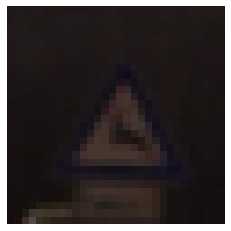

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


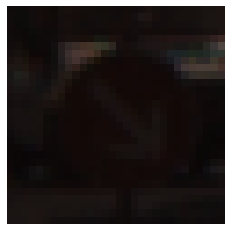

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


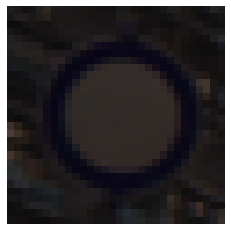

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
# Show Train images 
import matplotlib.pyplot as plt

def show_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
show_images(X_train, Y_train, 3)

In [25]:
# Build Model
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Train Model
epochs = 10
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)

Epoch 1/10
858/858 [==============================] - 10s 12ms/step - loss: 1.3528 - accuracy: 0.6117 - val_loss: 0.1628 - val_accuracy: 0.9549
Epoch 2/10
858/858 [==============================] - 10s 11ms/step - loss: 0.2314 - accuracy: 0.9287 - val_loss: 0.0629 - val_accuracy: 0.9830
Epoch 3/10
858/858 [==============================] - 11s 12ms/step - loss: 0.1348 - accuracy: 0.9581 - val_loss: 0.0298 - val_accuracy: 0.9922
Epoch 4/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0899 - accuracy: 0.9718 - val_loss: 0.0299 - val_accuracy: 0.9921
Epoch 5/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0746 - accuracy: 0.9766 - val_loss: 0.0247 - val_accuracy: 0.9946
Epoch 6/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.0228 - val_accuracy: 0.9952
Epoch 7/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0194 - val_accuracy:

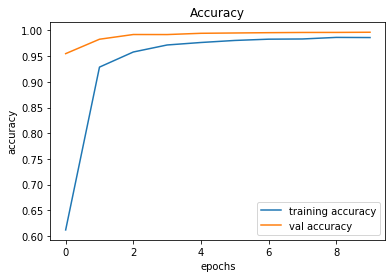

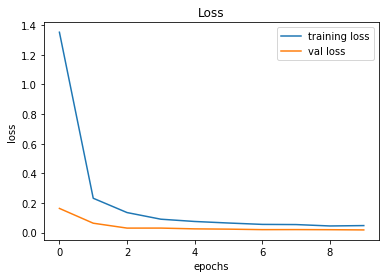

In [28]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [36]:


#Predicting with the test data
y_test=pd.read_csv("D:\CODE\ML\ML_FINAL_PROJECT\dataset\Test.csv")
print(y_test.head())
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values
print(labels)



Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png
['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


In [37]:
d=[]
for j in labels:
    i1=cv2.imread("D:\CODE\ML\ML_FINAL_PROJECT\dataset\\" +j)
    i2=Image.fromarray(i1,'RGB')
    i3=i2.resize((height,width))
    d.append(np.array(i3))

In [38]:


X_test=np.array(d)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
import h5py
from keras.models import load_model
model.save('trained-model.h5')

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.969200316706255